<a href="https://colab.research.google.com/github/kashish1203/minecrafters/blob/main/Final_Mine_Crafters_Group_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis (EDA) & Preprocessing:**

T1. Explore the dataset assigned to your team and provide:


### a. A summary of the dataset (should include information columns present, attribute types, null values, and a summary of each attribute).

**Data Source:** The data is collected from analogue and digital sensors installed on the APU(Air Processing Unit) of a metro train's compressor. These sensors monitor different aspects of the compressor's operation.

**Sensors:** The dataset includes readings from the following sensors:

- **Pressure Sensor:**Monitors pressure levels within the APU.
- **Temperature Sensor:** Measures the temperature of the APU.
- **Motor Current Sensor:** Records the electrical current consumed by the compressor's motor.
- **Air Intake Valve Sensor:** Monitors the status or position of the air intake valve.


**What is APU?**\
-- An APU, or Air Processing Unit, in the context of a metro train's compressor, refers to a component that plays a crucial role in providing clean and conditioned air for various systems within the train. The APU is responsible for filtering, cooling, and sometimes heating the air before it is distributed to different parts of the train, ensuring a comfortable and safe environment for passengers and crew.

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np

In [2]:
# Mounting Google drive to fetch dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [4]:
# Getting first five instances of dataset
df.head(5)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
# Getting the shape of dataset
df.shape

(1516948, 17)

In [6]:
# Getting the names of columns present in the dataset
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [7]:
# Getting column/attribute type
df.dtypes

Unnamed: 0           int64
timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object

Only one categorical variable "timestamp" and rest are numerical variables/attributes.\
**No need for Encoding**

### Pre-Processing


In [8]:
# Checking null values
df.isnull().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

**No null values are present.**

In [9]:
#Checking duplicate rows
df.duplicated().sum()

0

**No Duplicate Instances are present.**

In [10]:
# Droping Unnecessary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
# Converting 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [12]:
# Getting number unique values for each column
df.nunique()

timestamp          1516948
TP2                   5257
TP3                   3683
H1                    2665
DV_pressure           2257
Reservoirs            3682
Oil_temperature       2462
Motor_current         1809
COMP                     2
DV_eletric               2
Towers                   2
MPG                      2
LPS                      2
Pressure_switch          2
Oil_level                2
Caudal_impulses          2
dtype: int64

**Observation**
- some columns may be nominal/ordinal type since only two unique values for them.


In [13]:
# Getting categorical columns which are already encoded
cat_cols = []
num_cols = []
col = df.columns
for i in col:
  cnt = df[i].nunique()
  if df[i].dtypes != 'datetime64[ns]':
    if cnt <= 2 :
      val = sorted(df[i].unique())
      print(f'unique values for {i}: {val}')
      print(f'value counts {i}: {cnt}\n')
      cat_cols.append(i)
    else:
      num_cols.append(i)


unique values for COMP: [0.0, 1.0]
value counts COMP: 2

unique values for DV_eletric: [0.0, 1.0]
value counts DV_eletric: 2

unique values for Towers: [0.0, 1.0]
value counts Towers: 2

unique values for MPG: [0.0, 1.0]
value counts MPG: 2

unique values for LPS: [0.0, 1.0]
value counts LPS: 2

unique values for Pressure_switch: [0.0, 1.0]
value counts Pressure_switch: 2

unique values for Oil_level: [0.0, 1.0]
value counts Oil_level: 2

unique values for Caudal_impulses: [0.0, 1.0]
value counts Caudal_impulses: 2



In [14]:
# Categorical columns
cat_cols

['COMP',
 'DV_eletric',
 'Towers',
 'MPG',
 'LPS',
 'Pressure_switch',
 'Oil_level',
 'Caudal_impulses']

In [15]:
# Numerical columns
num_cols

['TP2',
 'TP3',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current']

- 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current' are quantitative variables.
- 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses' are qualitative variables. Moreover, these variables are binary in nature.

**Description of Attributes:**\
(researched plus taken from assigned dataset description)\
Attributes in the dataset:
1. **Unnamed: 0:** An unnamed index or identifier for each record in the dataset.
2. **timestamp:** The timestamp indicating the time at which the readings were recorded.
3. **TP2:** Reading from the Pressure sensor, TP2 measures the pressure on the compressor.
4. **TP3:** Reading from the Pressure sensor, TP3 measure the pressure generated at the pneumatic panel.
5. **H1:** Reading from the Pressure sensor, H1 measure the pressure generated due to pressure drop when the discharge of the cyclonic
separator filter occurs.
6. **DV_pressure:** Reading from the Pressure sensor, which measure the pressure drop generated when the towers discharge air dryers; a zero
reading indicates that the compressor is operating under load.
7. **Reservoirs:** Reading related to reservoirs which has the measure of the downstream pressure of the reservoirs, which should be close to the
pneumatic panel pressure (TP3).
8. **Oil_temperature:** Reading of oil temperature on the compressor.
9. **Motor_current:** Reading of motor current which has the measure of the current of one phase of the three-phase motor;\
it presents values close to
  - 0A - when it turns off,
  - 4A - when working offloaded,
  - 7A - when working under load and
  - 9A - when it starts working.
10. **COMP:** Reading related to the electrical signal of the air intake valve on the compressor.
  - it is active when there is no air intake,
indicating that the compressor is either turned off or operating in an offloaded state.
11. **DV_eletric:** Reading related to electrical signal that controls the compressor outlet valve.
  - it is active when the compressor is functioning under load
  - inactive when the compressor is either off or operating in an offloaded state.
12. **Towers:** Reading related to the electrical signal that defines the tower responsible for drying the air and the tower responsible
for draining the humidity removed from the air.
  - when not active, it indicates that tower one is functioning
  - when active, it indicates that tower two is in operation.
13. **MPG:** Reading related to MPG (miles per gallon).\
It measures the electrical signal responsible for starting the compressor under load by activating the intake valve
when the pressure in the air production unit (APU) falls below 8.2 bar;\
It activates the COMP sensor, which assumes
the same behaviour as the MPG sensor.
14. **LPS:** Reading of LPS (low pressure system) which measures the electrical signal that detects and activates when the pressure drops below 7 bars.
15. **Pressure_switch:** Reading from the pressure switch which measures the electrical signal that detects the discharge in the air-drying towers.
16. **Oil_level:** It measures the electrical signal that detects the oil level on the compressor\
It is active when the oil is below the
expected values.
17. **Caudal_impulses:** the electrical signal that counts the pulse outputs generated by the absolute amount of air
flowing from the APU to the reservoirs.




### b. Data Visualization, summarizing insights about the dataset through EDA.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Custom color palette # source seaborn documentation
palette = sns.cubehelix_palette(start=-0.2,rot=0.6, reverse=True)
color=sns.light_palette("#a275ac")

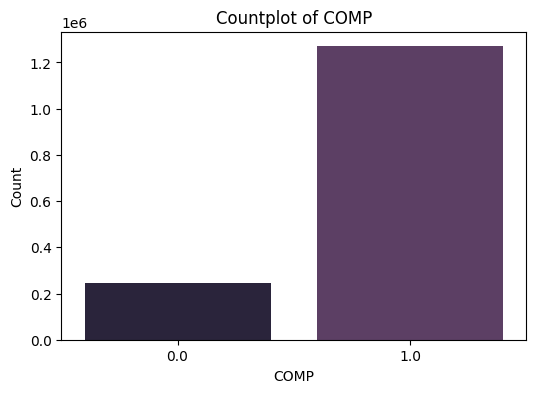

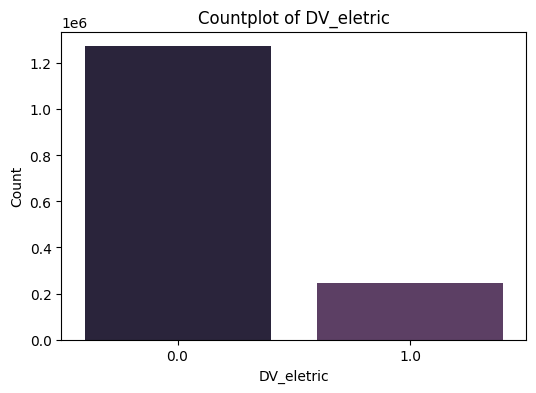

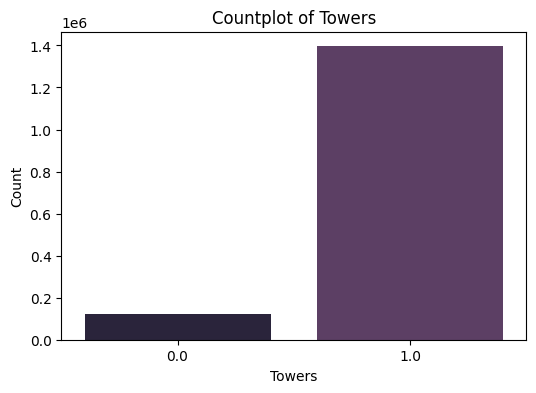

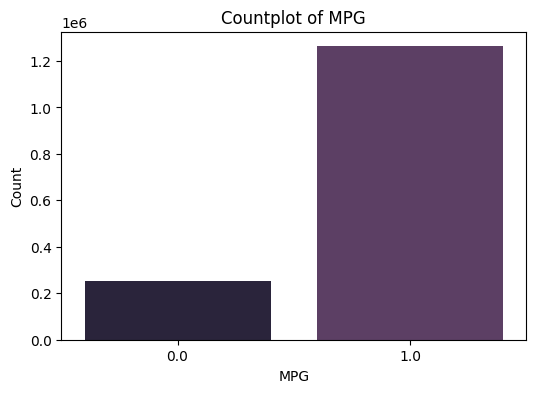

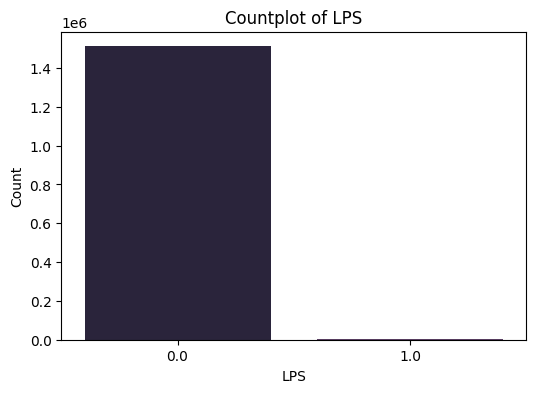

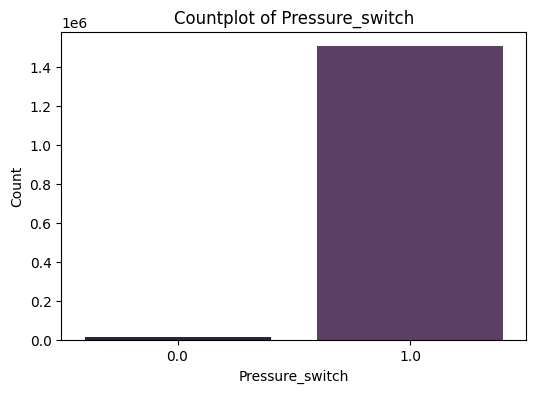

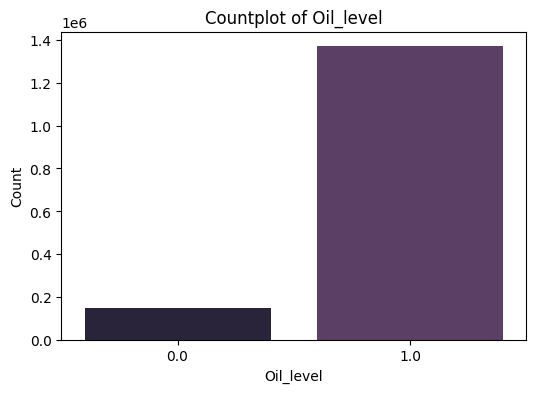

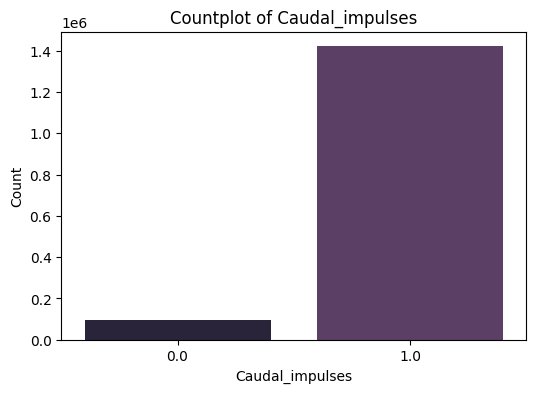

In [ ]:
# Countplot of the encoded categorical columns
for i, col in enumerate(cat_cols):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette=palette)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

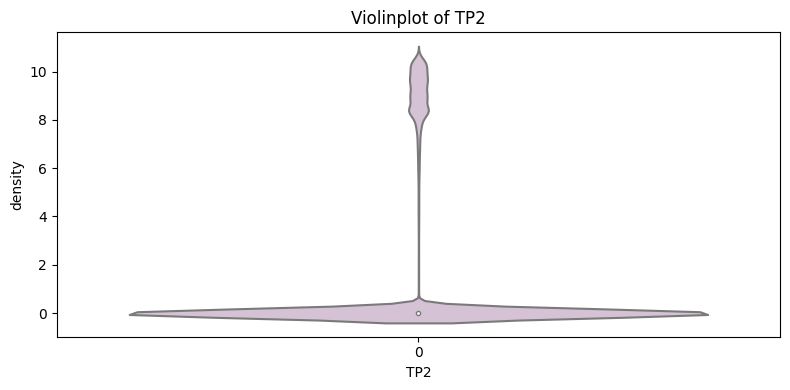

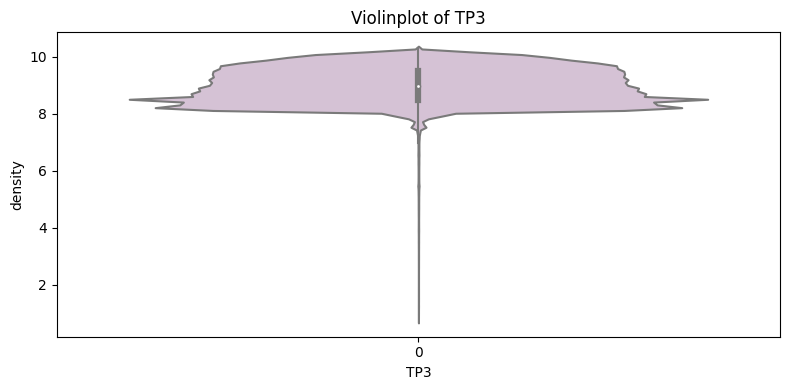

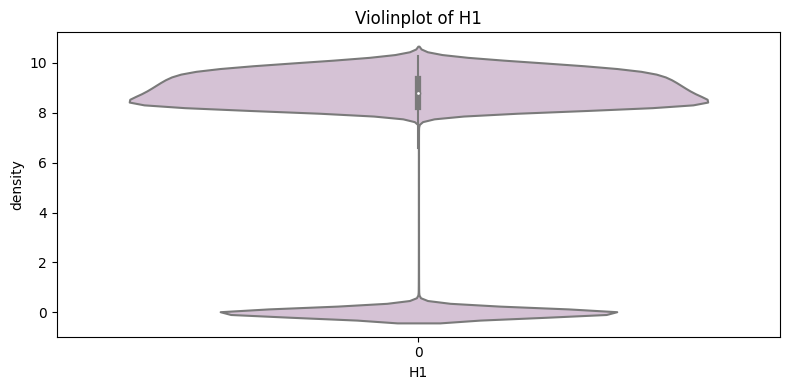

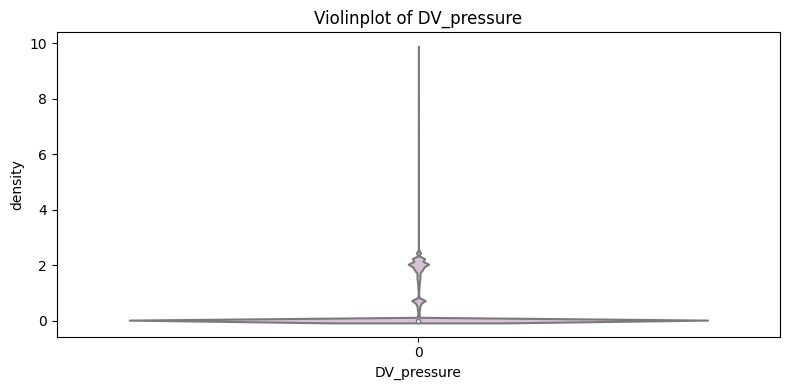

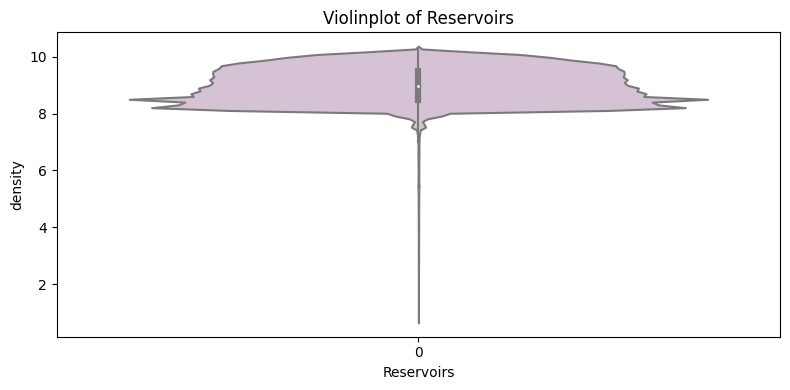

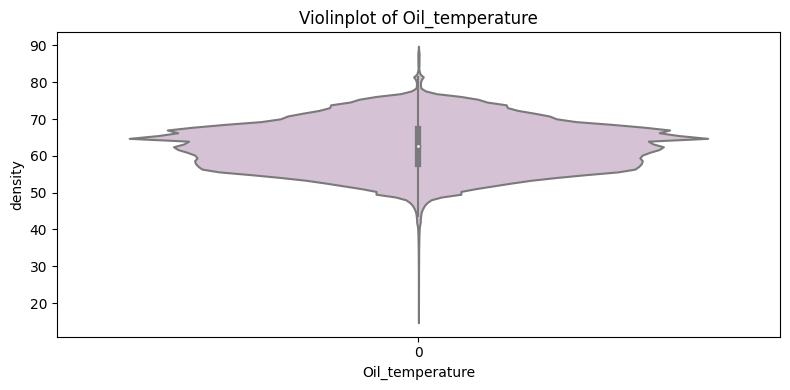

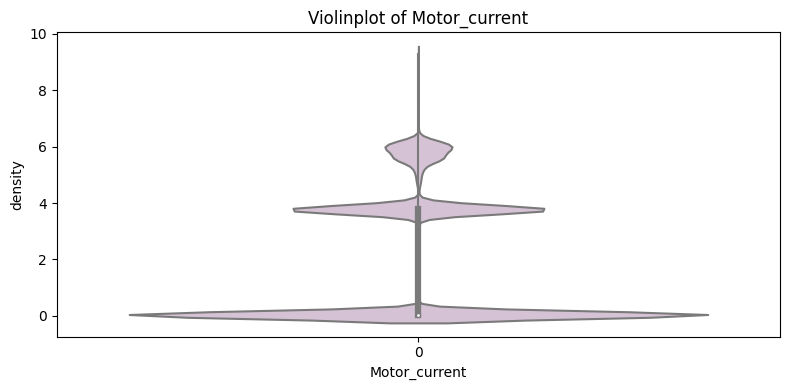

In [27]:
# Plotting Histogram and Box plot for numerical columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(df[col],color='thistle')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.title(f'Violinplot of {col}')
    plt.tight_layout()

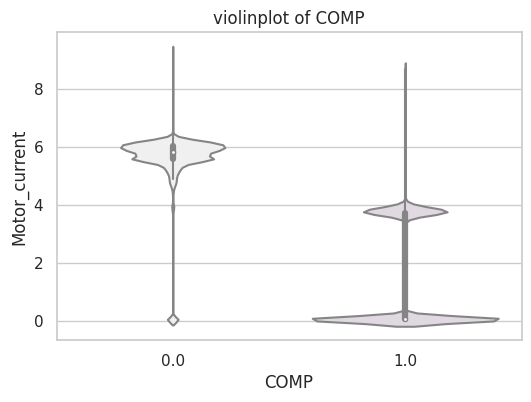

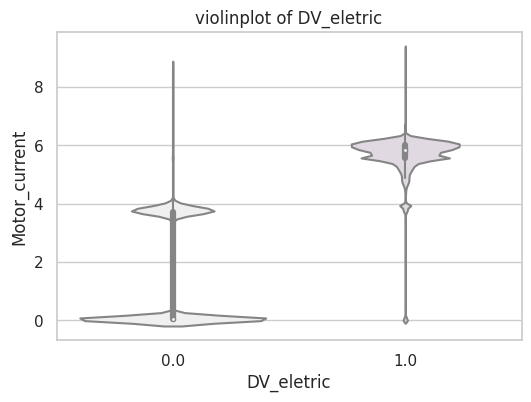

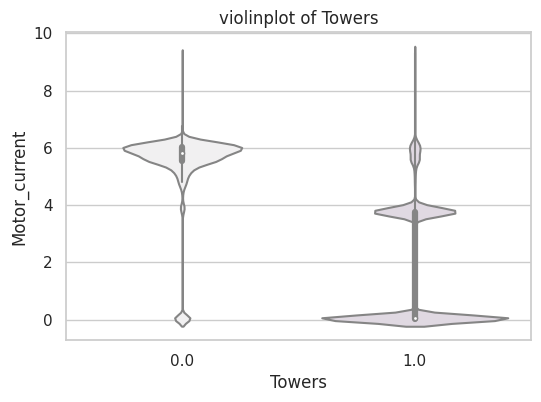

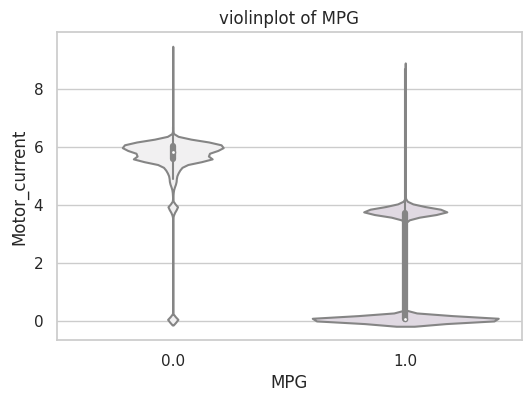

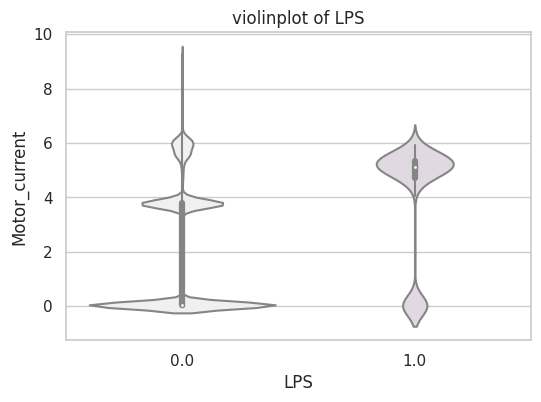

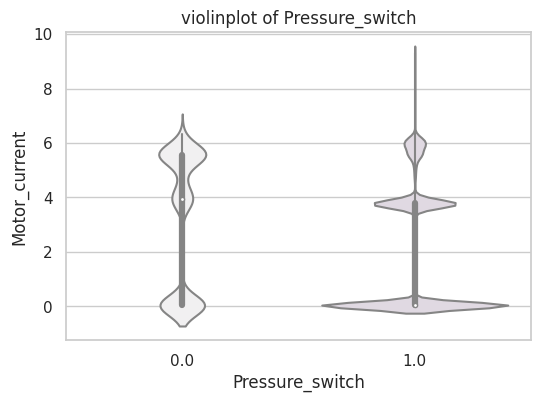

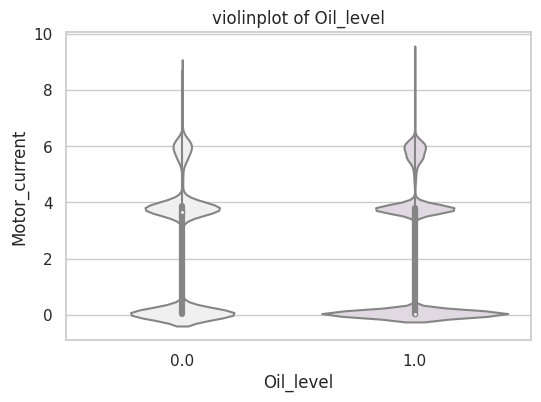

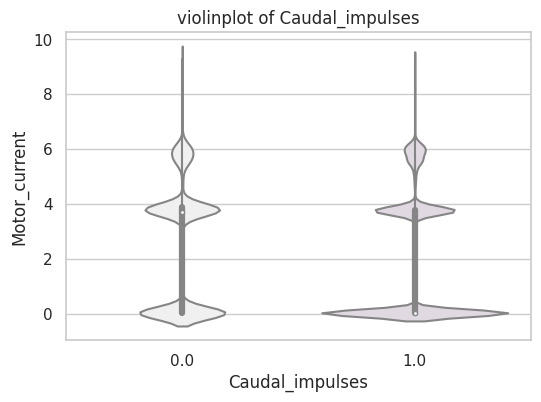

In [50]:
# Set the style and context for the plots
sns.set_style("whitegrid")
sns.set_context("notebook")
# Plotting line plot for Motor current Monthwise based on Compressor state
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=col,y='Motor_current', data=df, palette=color)
    plt.title(f'violinplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Motor_current')
    plt.show()

**Time-Series Analysis**

In [21]:
# Convert 'timestamp' column to datetime format for time-series analysis
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
# Extract time components-'date' for daily analysis
df['Date'] = df['timestamp'].dt.date
# Extract year, month, day, hour, minute, and second
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['Hour'] = df['timestamp'].dt.hour
df['Minute'] = df['timestamp'].dt.minute
df['Second'] = df['timestamp'].dt.second

df.head(3)

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,...,Pressure_switch,Oil_level,Caudal_impulses,Date,Year,Month,Day,Hour,Minute,Second
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,...,1.0,1.0,1.0,2020-02-01,2020,2,1,0,0,0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,...,1.0,1.0,1.0,2020-02-01,2020,2,1,0,0,10
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,...,1.0,1.0,1.0,2020-02-01,2020,2,1,0,0,19


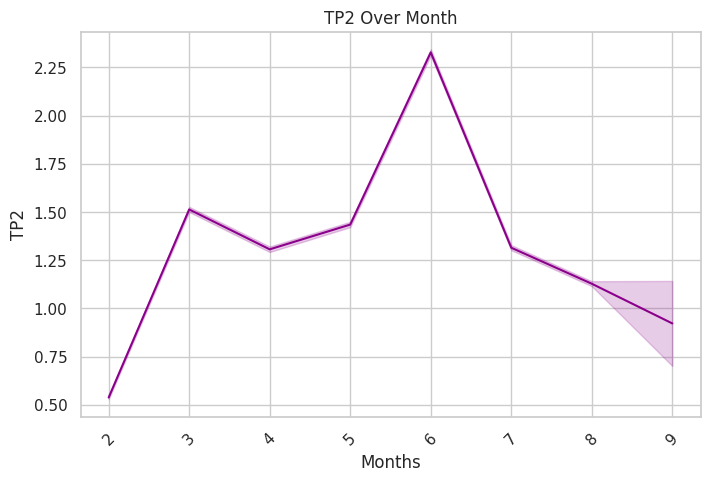

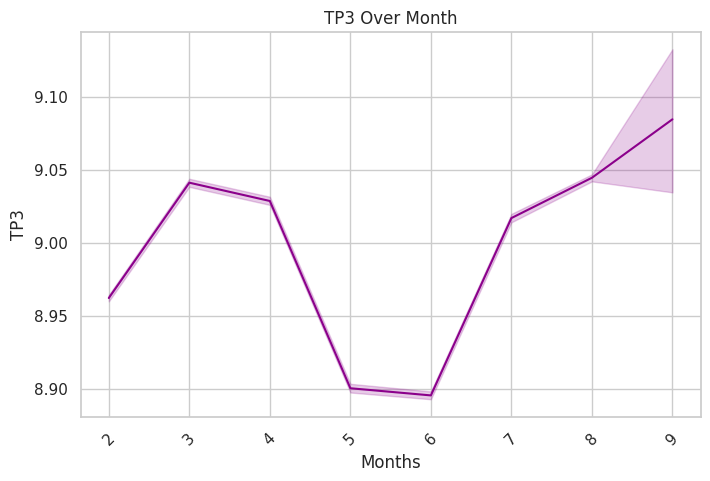

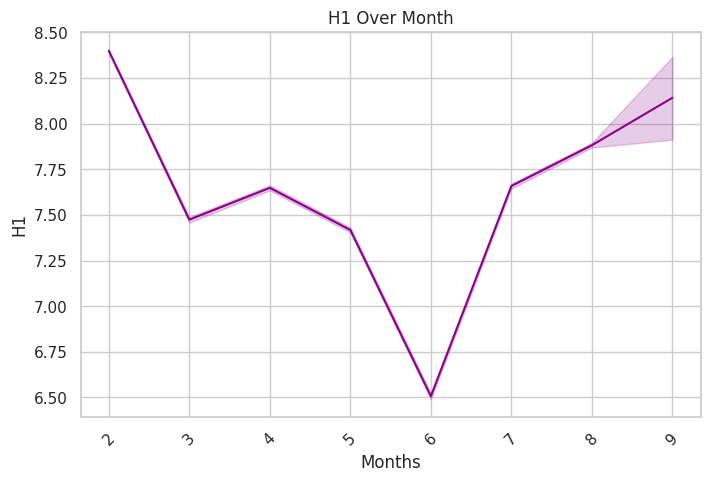

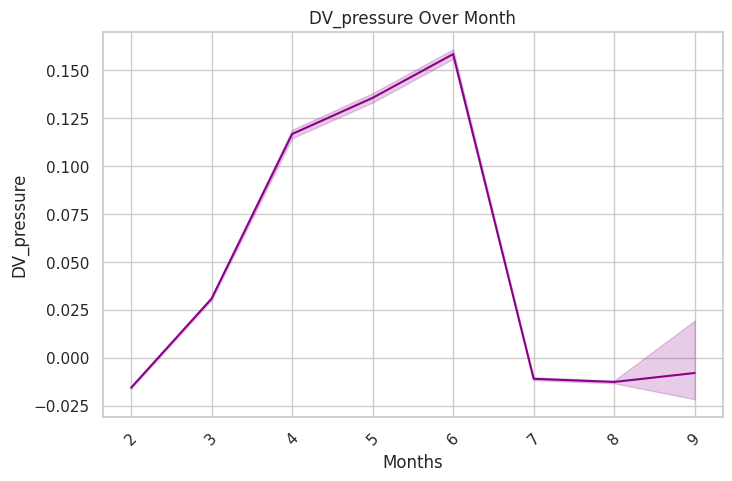

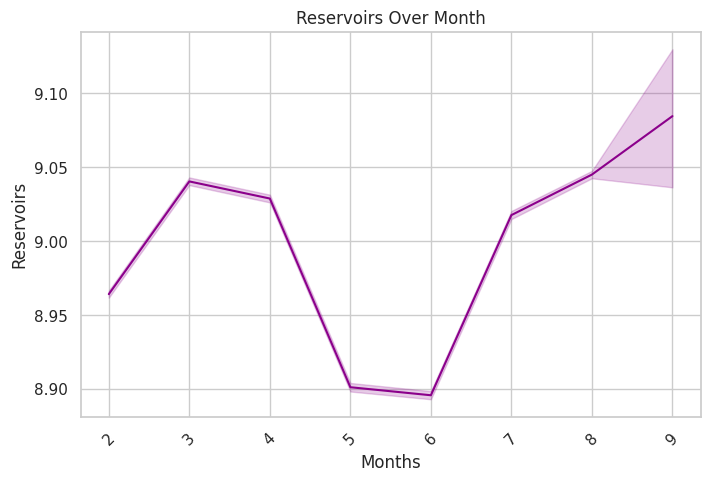

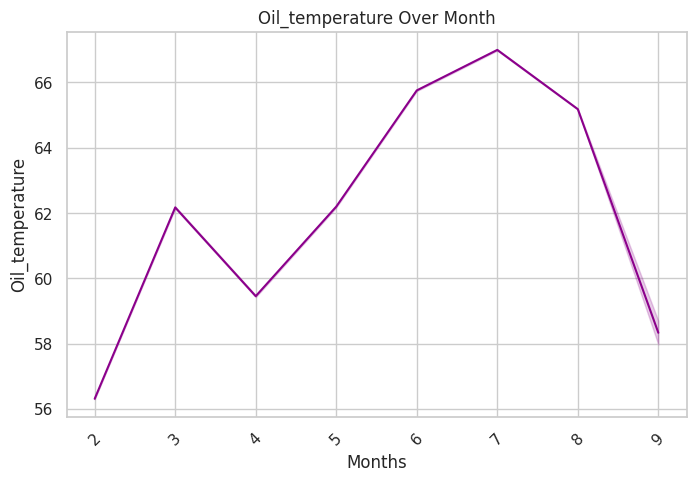

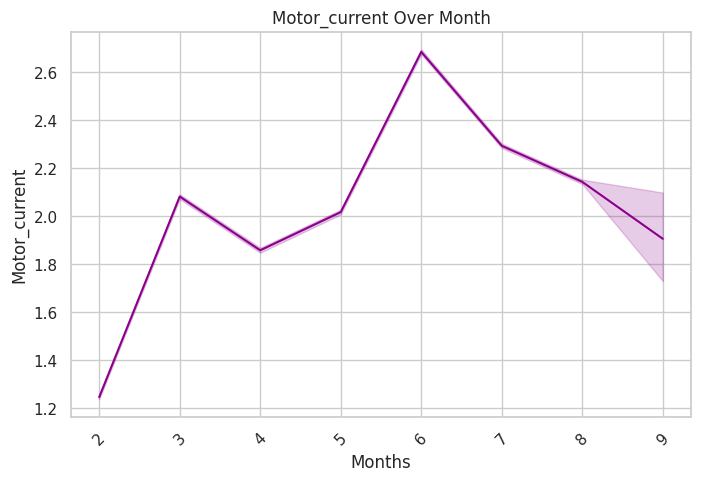

In [40]:
for col in num_cols:
    # Line plot of the numeric column over month
    plt.figure(figsize=(8,5))
    sns.lineplot(x='Month', y=col, data=df,color = 'darkmagenta')
    plt.title(f'{col} Over Month')
    plt.xlabel('Months')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()

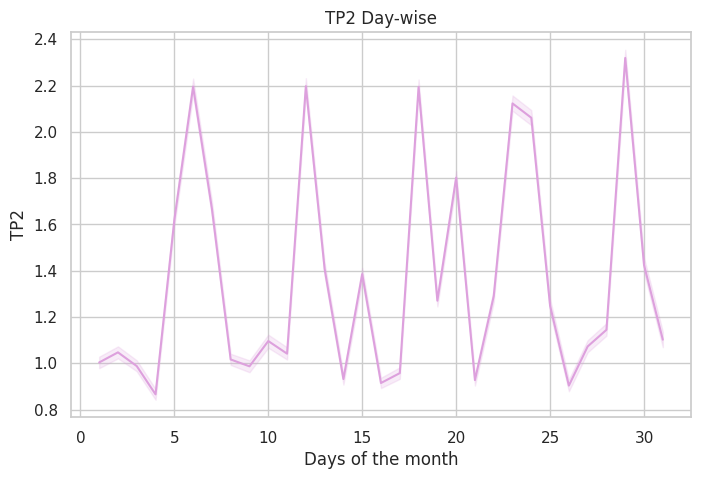

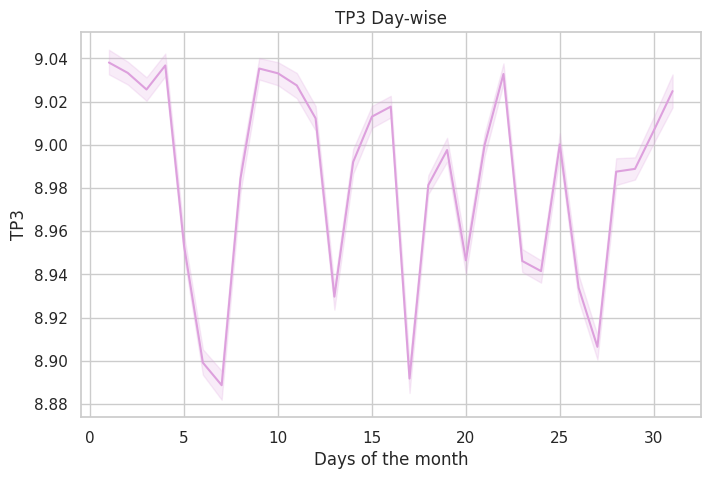

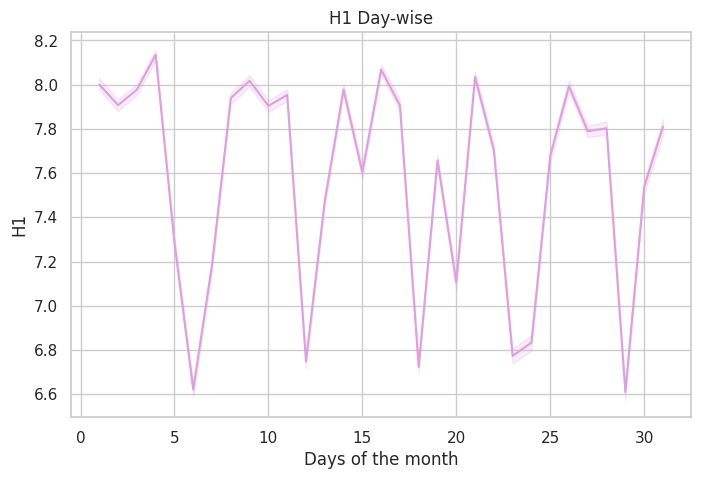

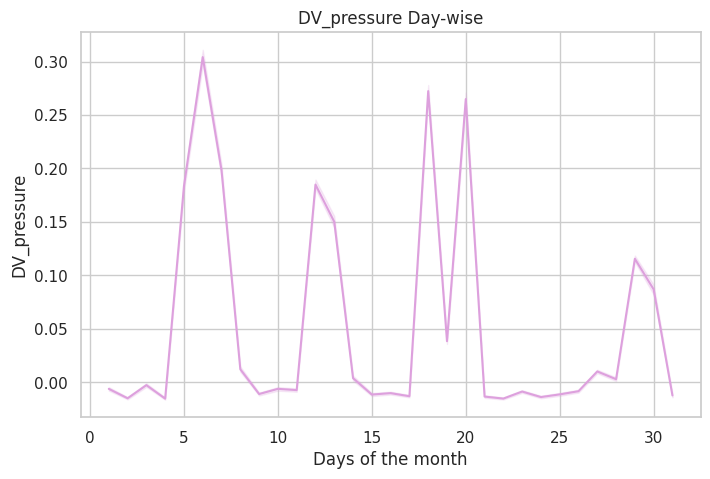

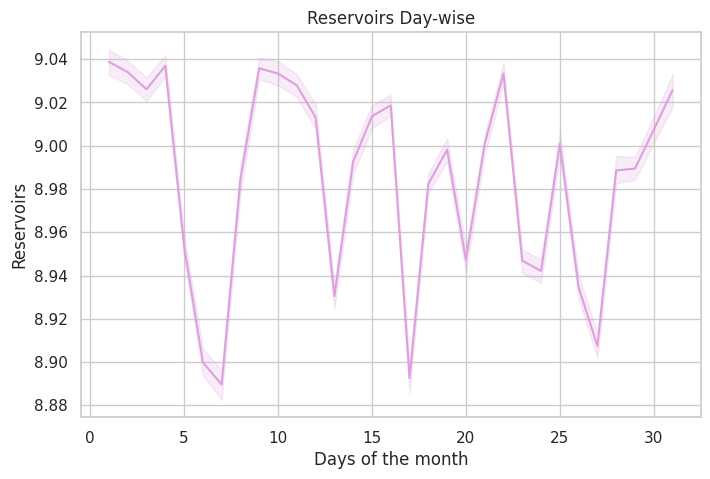

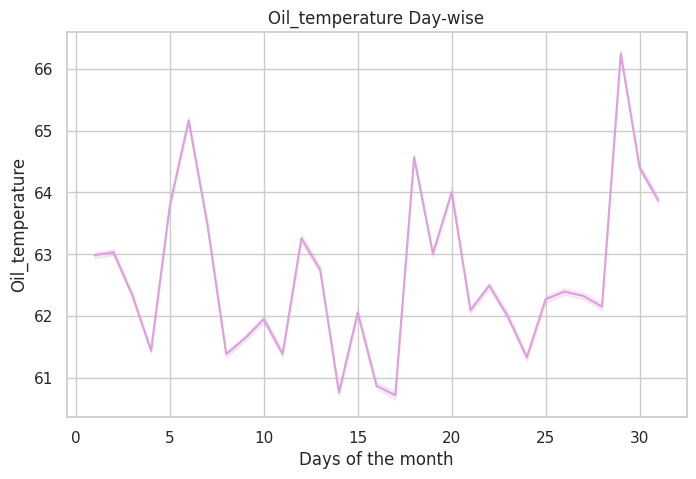

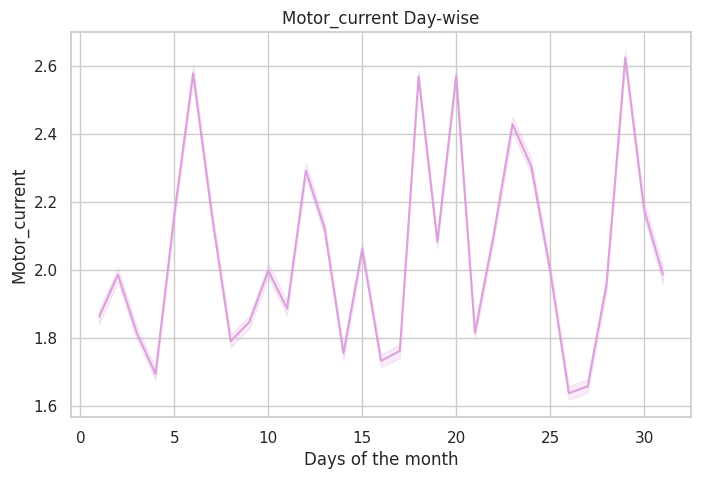

In [70]:
for col in num_cols:
    # Line plot of the numeric column over days
    plt.figure(figsize=(8, 5))
    sns.lineplot(x='Day', y=col, data=df, color= 'plum')
    plt.title(f'{col} Day-wise')
    plt.xlabel('Days of the month')
    plt.ylabel(col)
    plt.show()

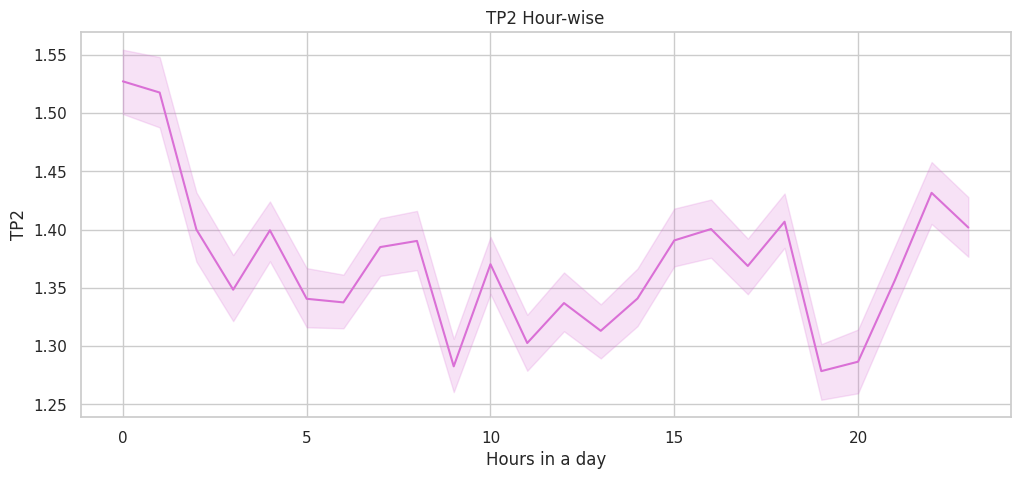

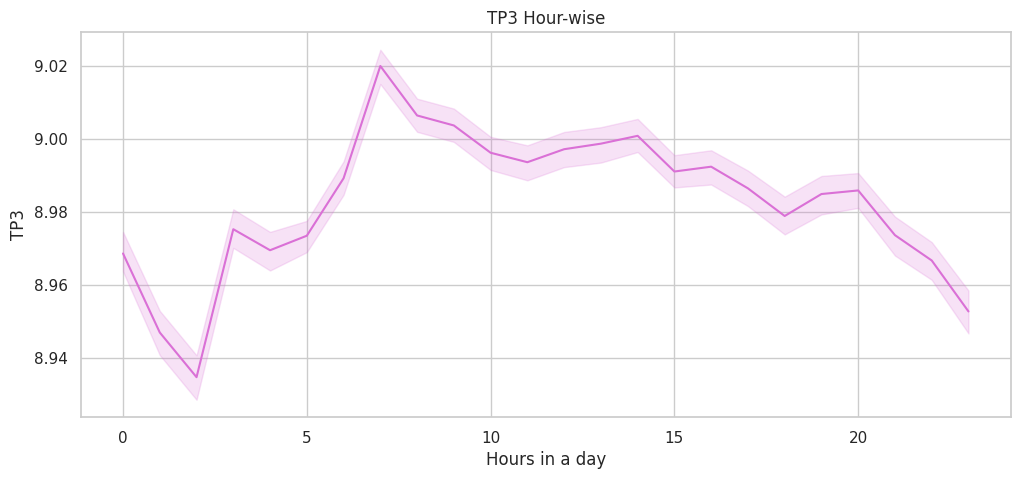

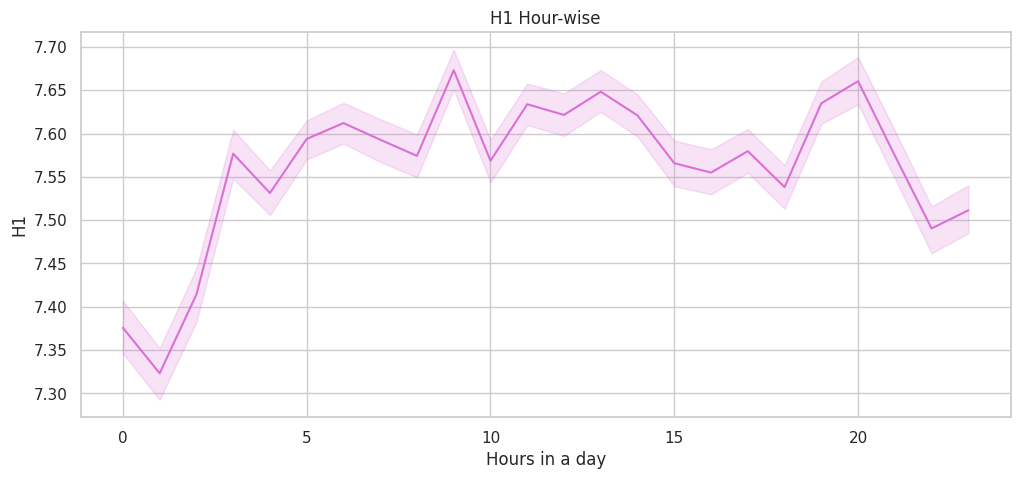

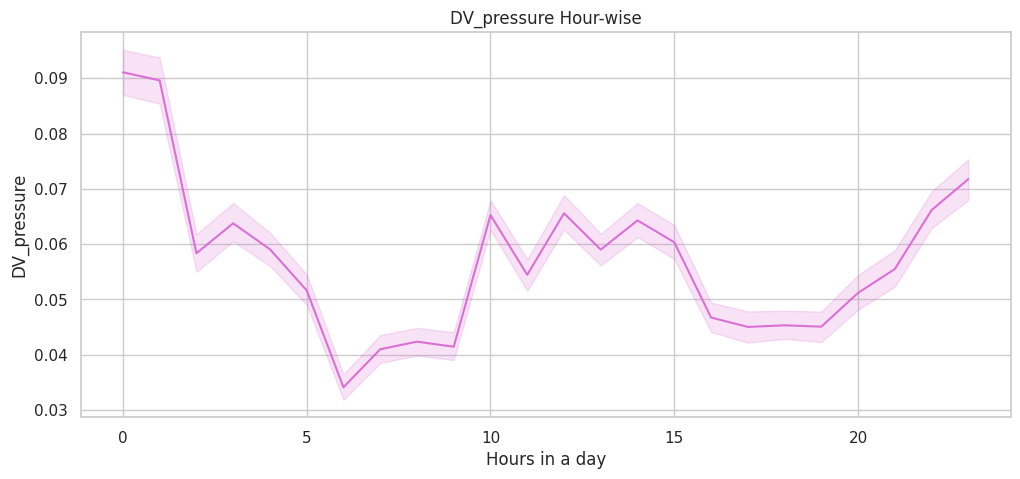

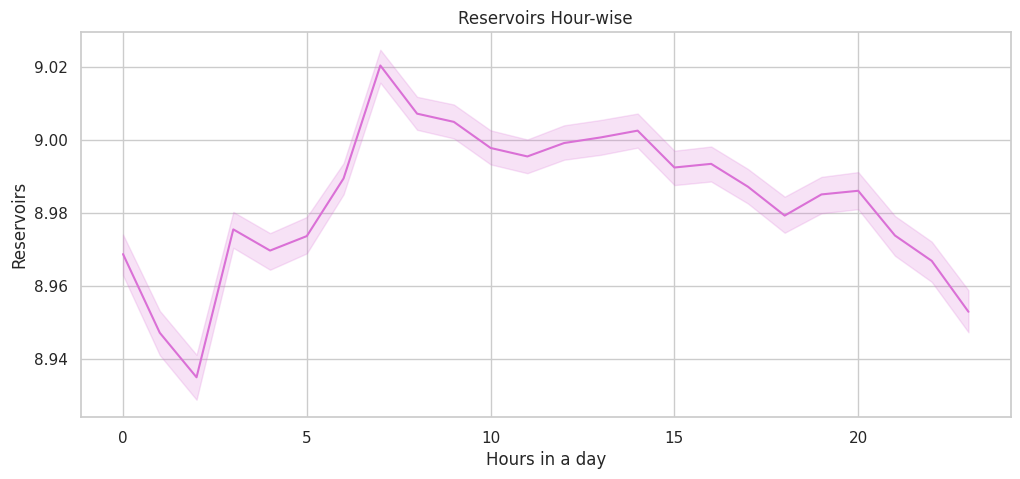

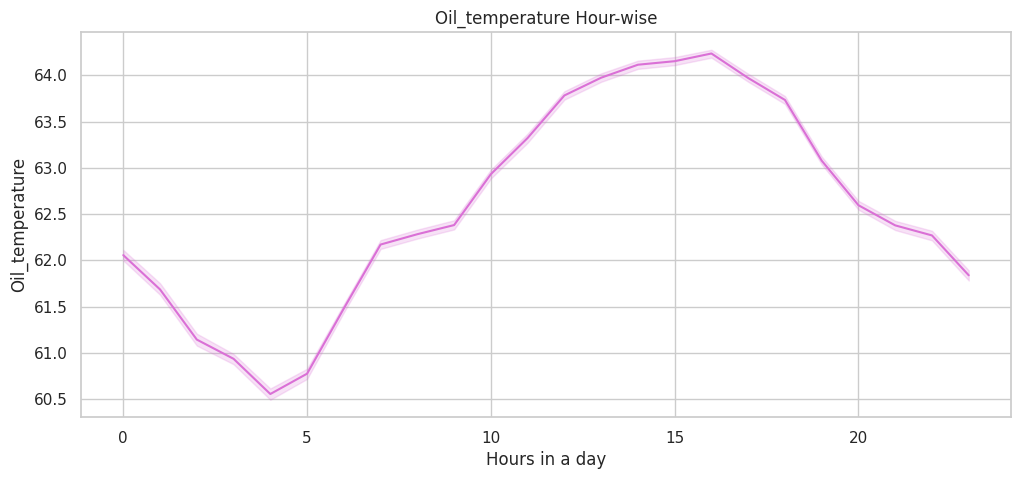

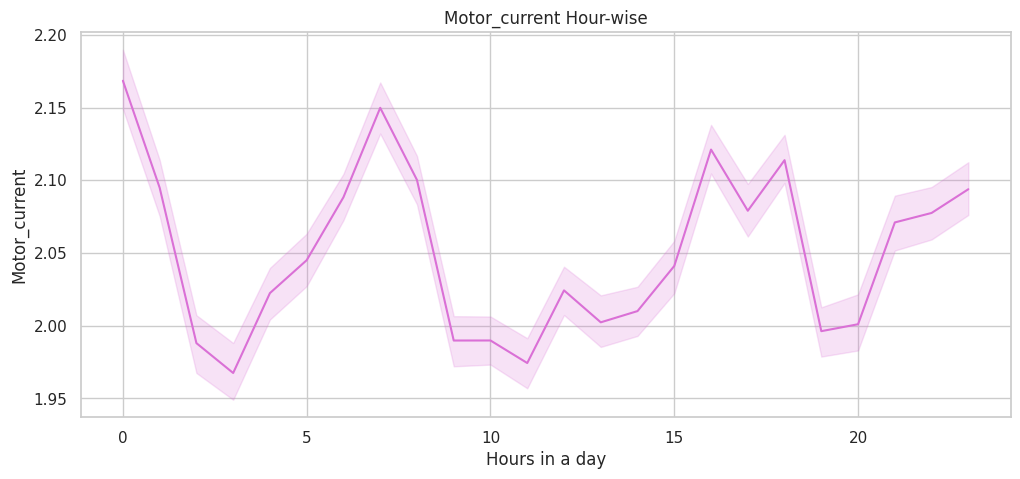

In [60]:
for col in num_cols:
    # Line plot of the numeric column over hours
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='Hour', y=col, data=df,color='orchid')
    plt.title(f'{col} Hour-wise')
    plt.xlabel('Hours in a day')
    plt.ylabel(col)
    plt.show()

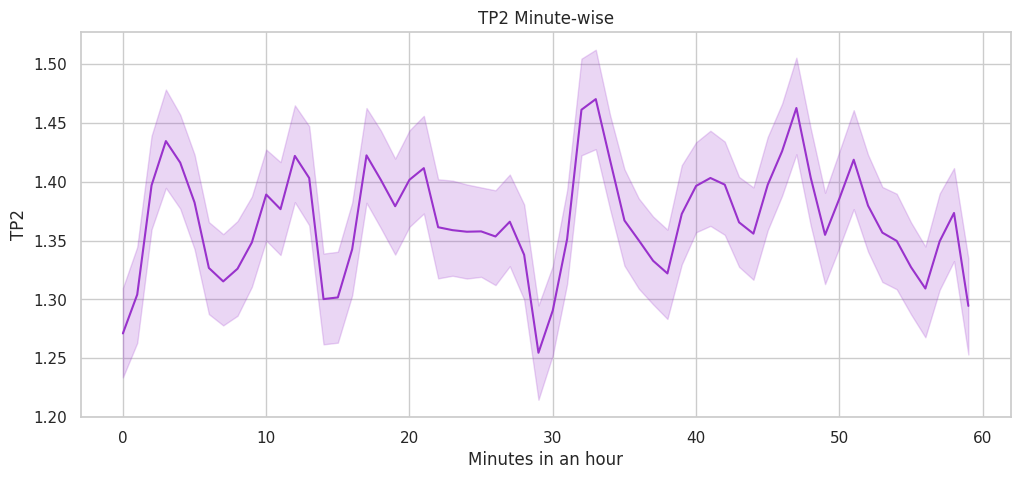

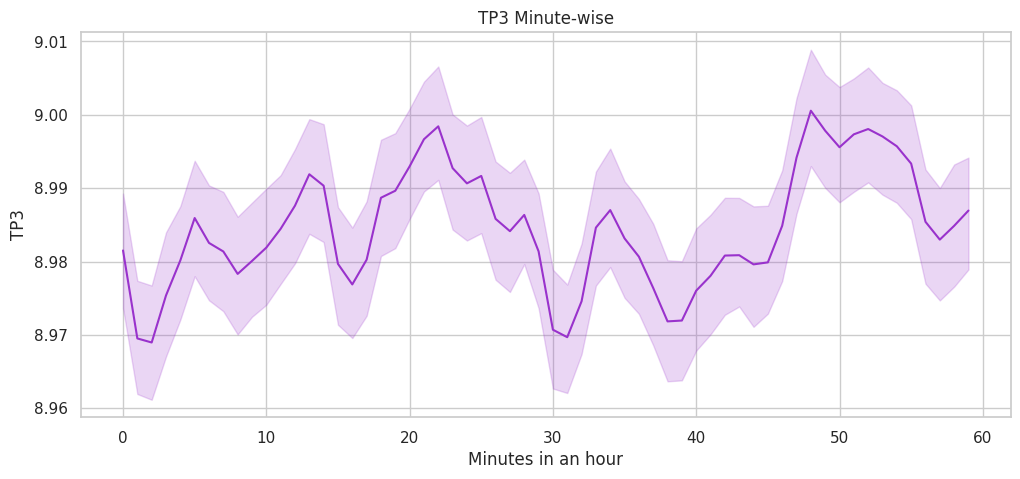

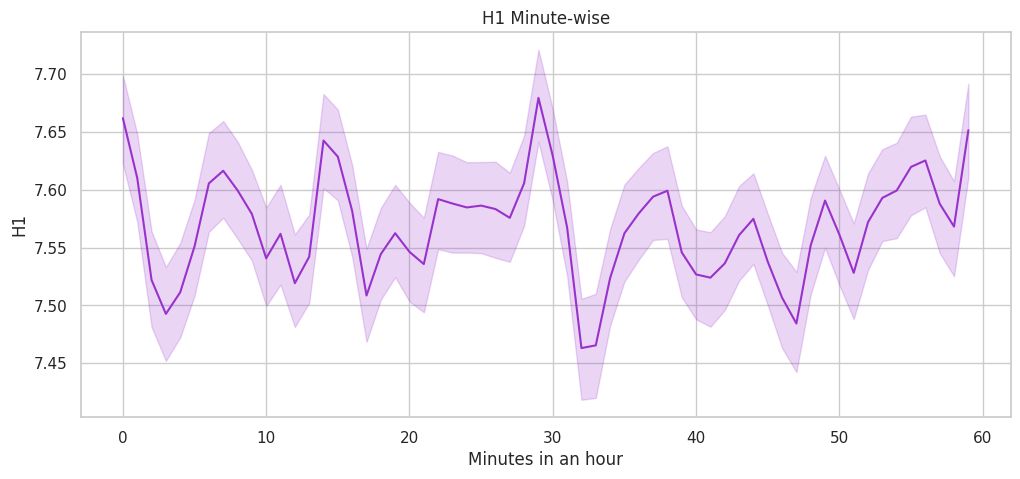

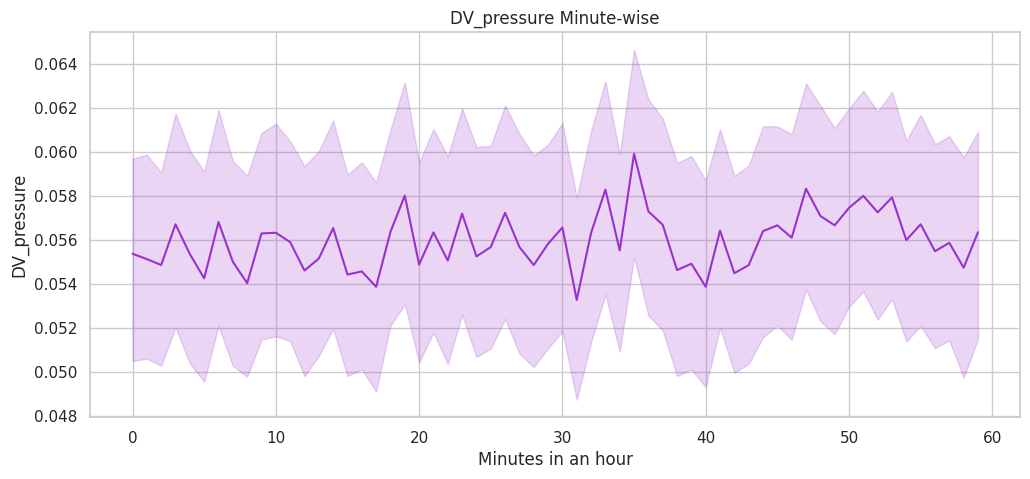

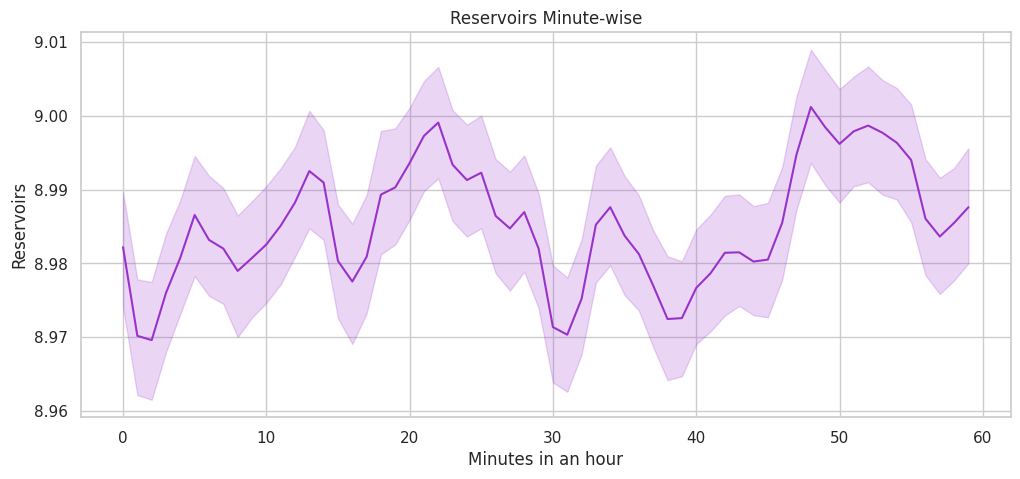

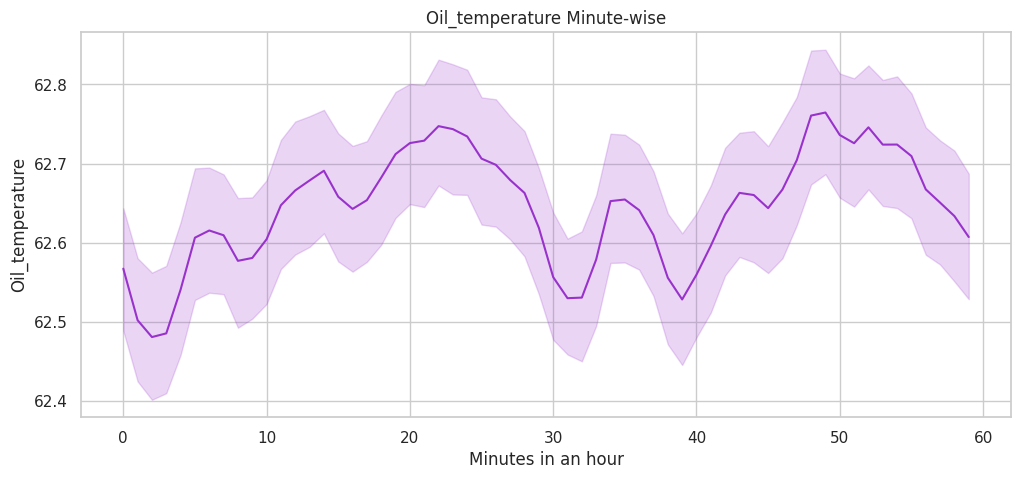

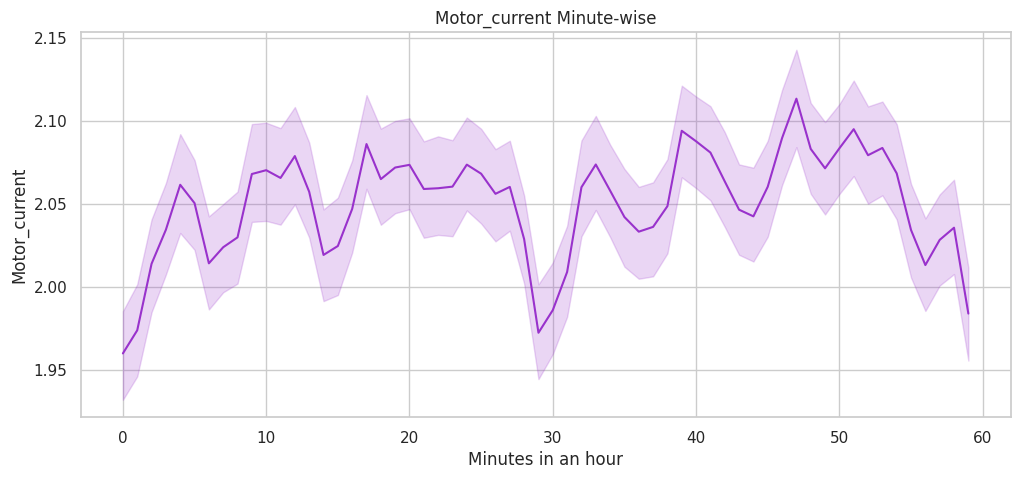

In [68]:
for col in num_cols :
    # Line plot of the numeric column over minutes
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='Minute', y=col, data=df, color='darkorchid')
    plt.title(f'{col} Minute-wise')
    plt.xlabel('Minutes in an hour')
    plt.ylabel(col)
    plt.show()

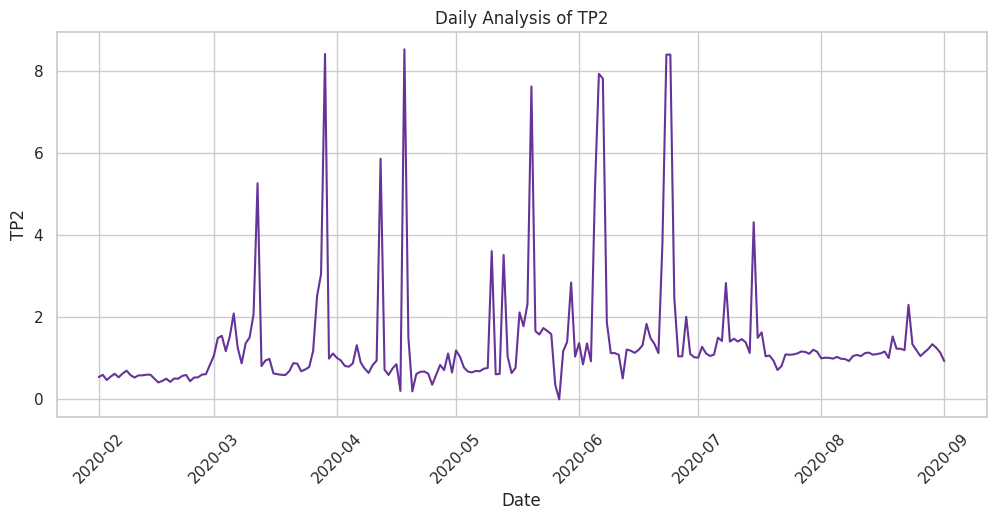

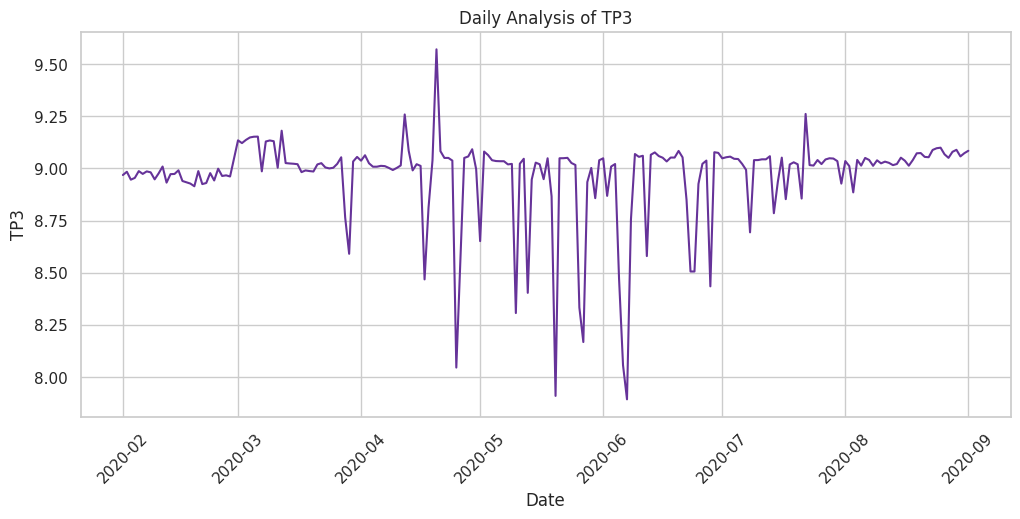

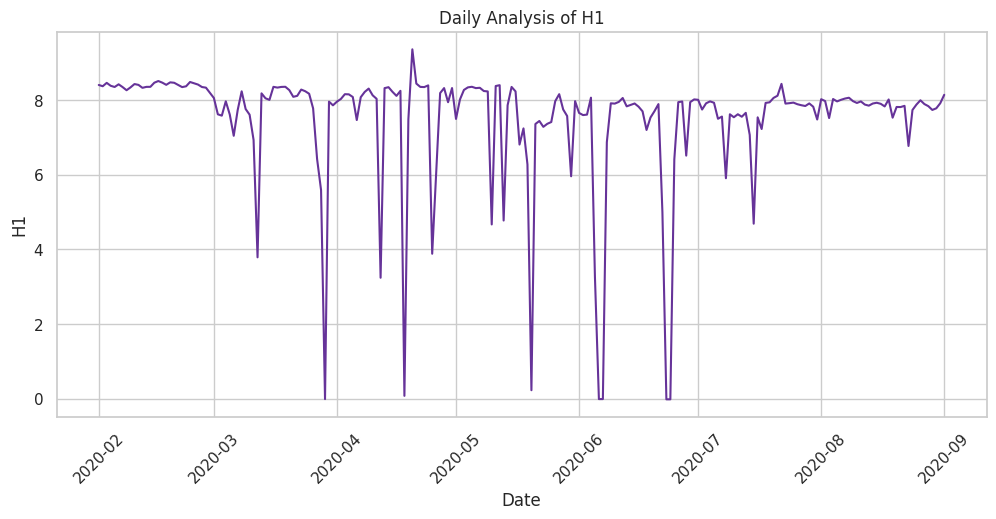

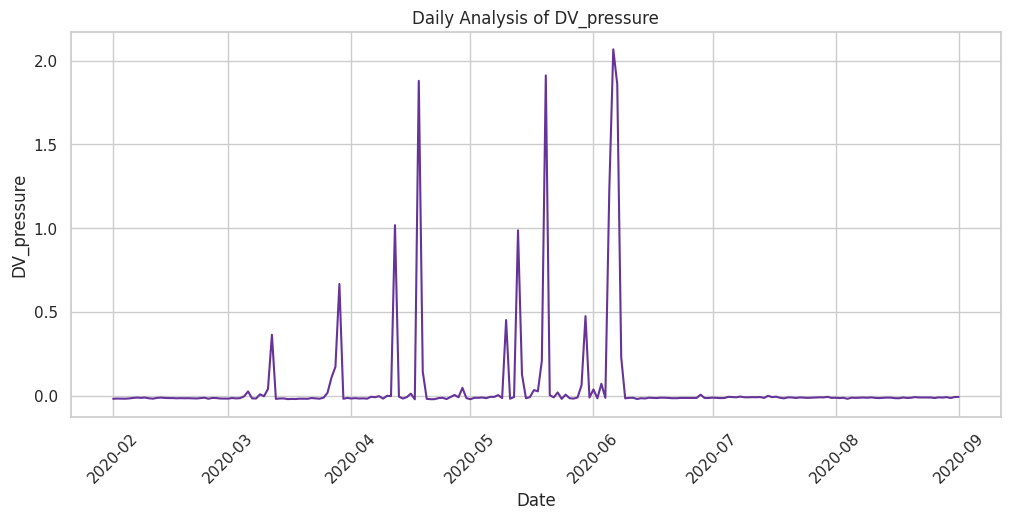

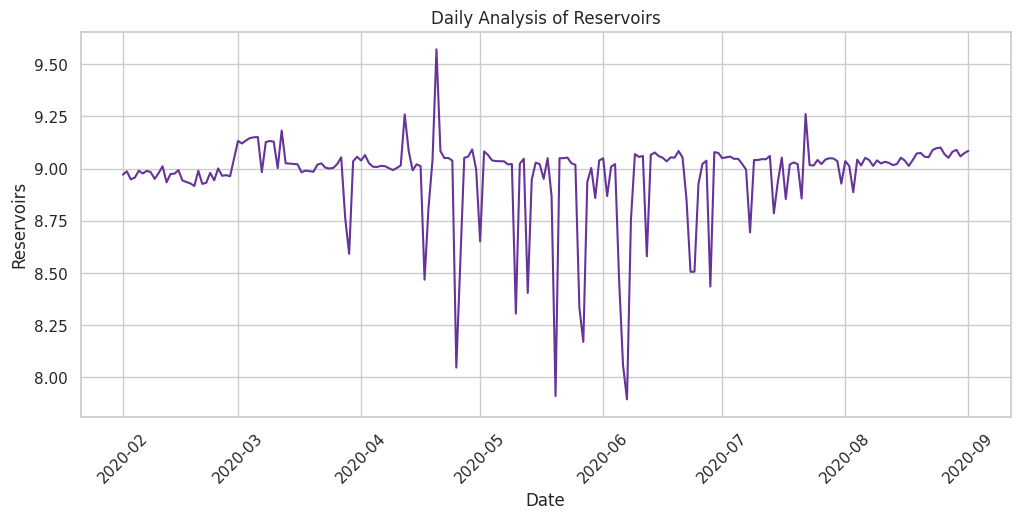

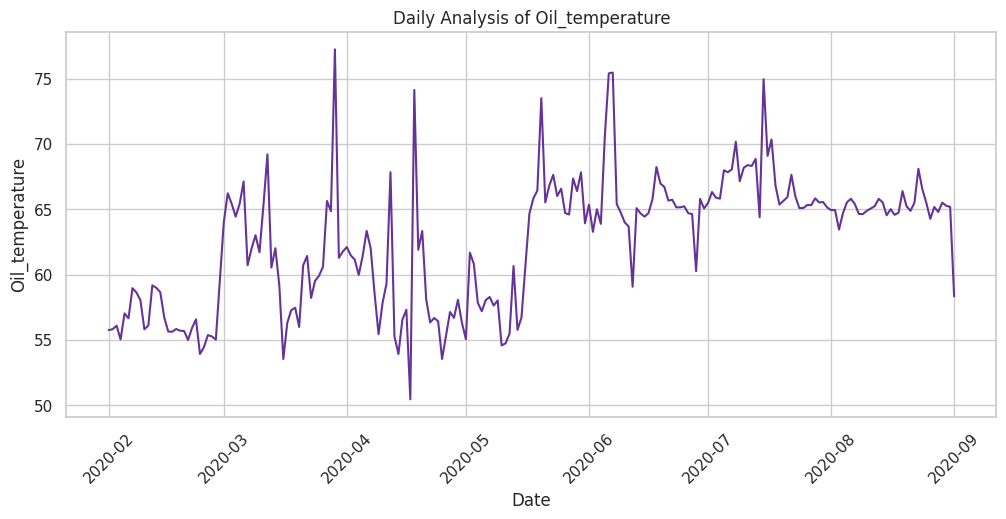

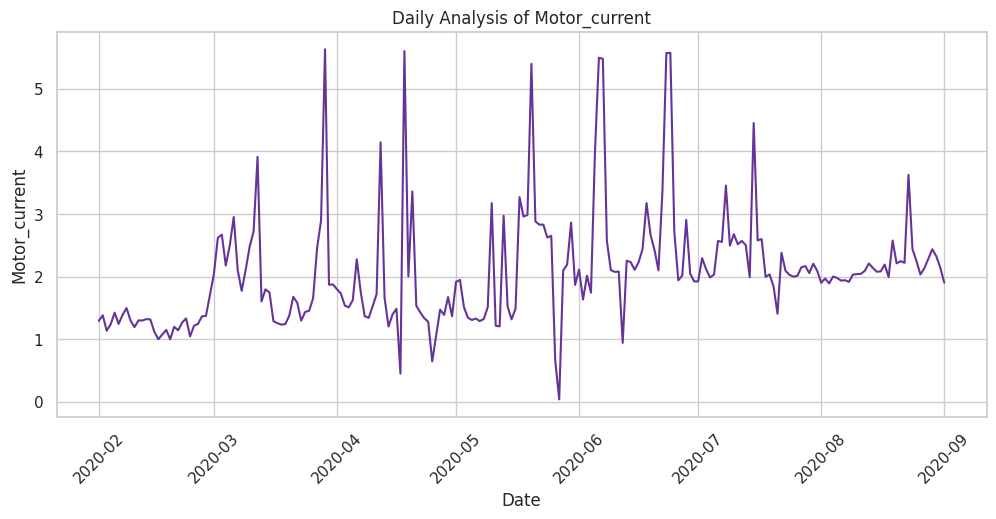

In [69]:
# Line plot of the numeric column on daily basis
for col in num_cols:
    # Group data by date and calculate the mean for the numerical column
    daily_data = df.groupby('Date')[col].mean().reset_index()
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='Date', y=col, data=daily_data, color='rebeccapurple')
    plt.title(f'Daily Analysis of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()


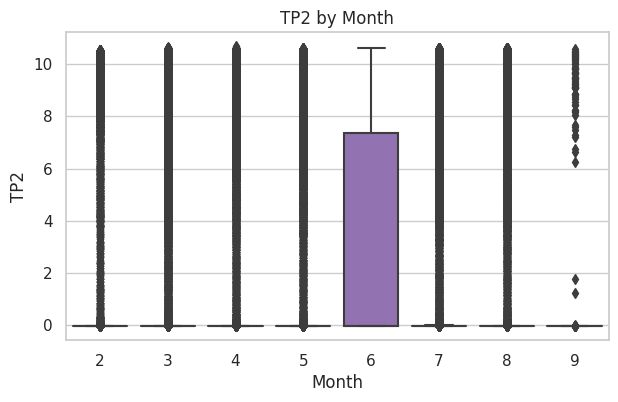

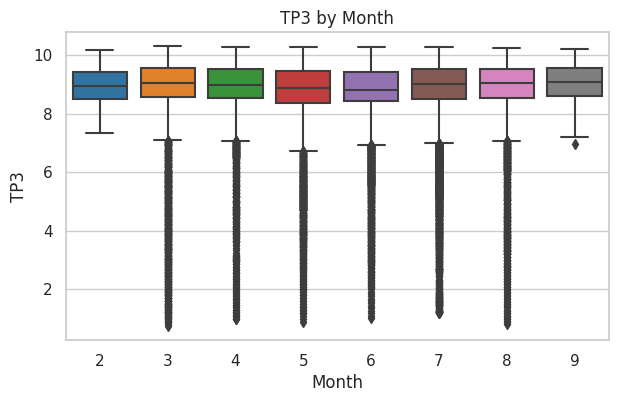

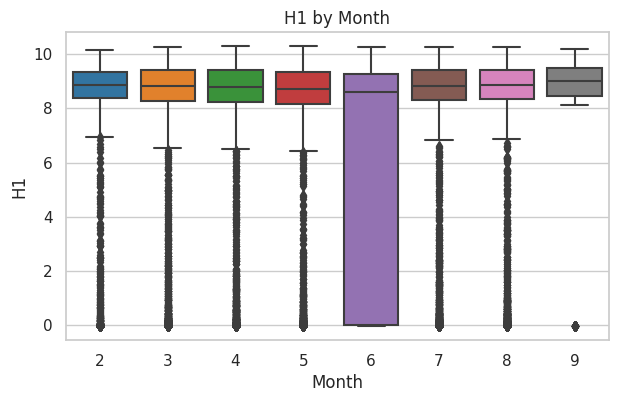

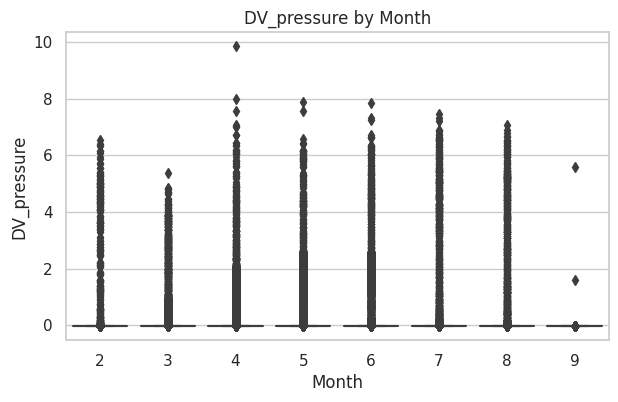

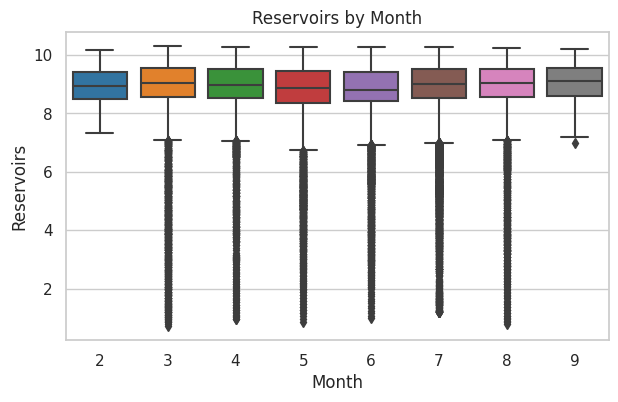

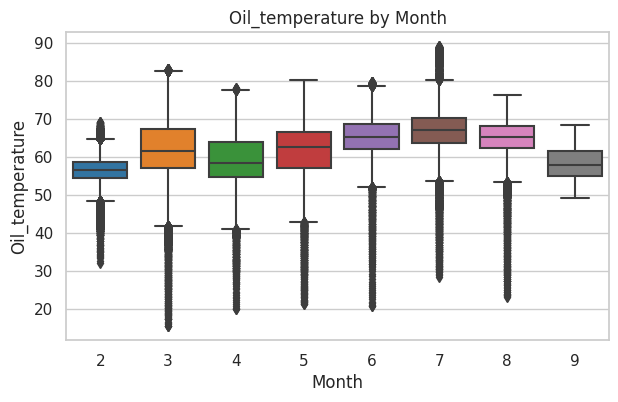

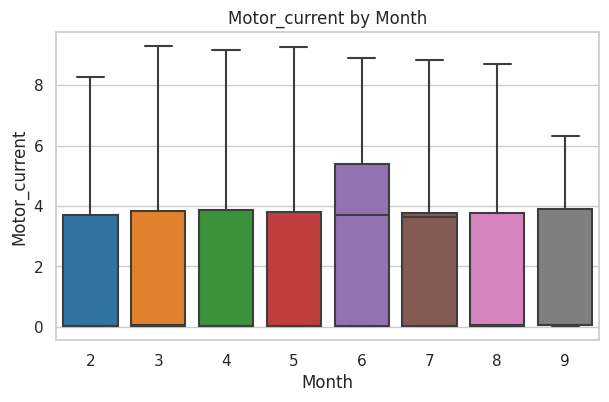

In [55]:
# Boxplot of the numeric column by Month
for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='Month', y=col, data=df)
    plt.title(f'{col} by Month')
    plt.xlabel('Month')
    plt.ylabel(col)
    plt.show()

## **Regression Analysis:**

### T2. Identify and list regression problems on your assigned dataset. Which one does seem the most interesting to you and why?

Regression problems involve predicting a continuous numeric value based on input features. Given the attributes in the metro train dataset, here are a few potential regression problems:

1. **Predict Motor Current:** Given sensor readings such as 'TP2', 'TP3', 'H1', and 'Oil_temperature', predict the 'Motor_current' value, which represents the electrical current consumed by the motor. This could be valuable for monitoring motor health and efficiency.

2. **Oil Temperature Prediction:** Use attributes like 'TP2', 'TP3', 'H1', and 'Motor_current' to predict the 'Oil_temperature'. Accurate prediction of oil temperature is crucial for maintaining optimal compressor operation and preventing overheating.

3. **Air Pressure Prediction:** Given sensor readings like 'TP2', 'TP3', 'H1', and 'Oil_temperature', predict the 'DV_pressure' or other pressure-related attributes. Accurate pressure prediction is essential for maintaining safe and efficient compressor operation.

4. **Estimating Reservoir Levels ('Reservoirs'):** Predict the levels of the 'Reservoirs' using other attributes. This could help in maintaining appropriate fluid levels and preventing issues due to under- or overfilling.



**Selecting the Most Interesting Problem:**

Choosing the most interesting problem depends on goals, domain expertise, and the potential impact of solving the problem. However, one problem that stands out is predicting the 'Motor_current'. Motor current consumption is a crucial indicator of the motor's health, efficiency, and potential issues. By accurately predicting motor current, you could:

- Identify abnormal motor behavior or impending failures.
- Optimize energy consumption by understanding how motor current changes in different operating conditions.
- Schedule maintenance more effectively, preventing unexpected breakdowns.
- Enhance passenger safety by addressing potential motor-related risks.
- Solving this problem would likely have a direct impact on the overall reliability, efficiency, and safety of the metro train system.



**Predicting Motor Current ('Motor_current'):**

**Reasons for Choosing this Problem:**

1. **Operational Significance:** Motor current consumption is a critical operational parameter in a metro train's compressor system. It directly relates to the health and performance of the motor driving the compressor.

2. **Safety and Reliability:** Accurate predictions of motor current can help in ensuring the safety and reliability of the metro train system. Any anomalies or deviations from expected motor current levels could indicate potential issues or wear and tear.

3. **Energy Efficiency:** Motor current is closely linked to energy efficiency. Predicting motor current allows for optimizing energy consumption, which is essential for cost savings and environmental sustainability.

4. **Maintenance Planning:** Predictive modeling of motor current can enable proactive maintenance planning. Detecting abnormal current spikes or drops can trigger maintenance interventions before critical failures occur, minimizing downtime.

5. **Data Availability:** Motor current data is often readily available in such systems, making it a practical choice for predictive modeling.

6. **Real-time Monitoring:** Accurate motor current predictions can support real-time monitoring, allowing for immediate responses to any deviations from expected current levels.




### T3. Build an end-to-end Machine Learning pipeline for your assigned dataset for the aforementioned most interesting regression problems found in T2.


Your pipeline should
include components for dataset preprocessing, transformation, regression model building
hyperparameter tuning, grid search or optimization, and evaluation. Report results on the
regression models with hyperparameter tuning, and report the best hyperparameter
values. Report results using at least two relevant evaluation metrics like RMSE,MAE.
Compare results for different models and give the reasoning for that.

### **Dataset Preprocessing**
prepare the data for modeling

Major steps for preprocessing are :

**1. Handle Missing Values:** Checking for missing values and use appropriate measures to clean them.\
Already done in Task-01.No missing values are present in the dataset.

**2. Feature Selection:** Decide which features (attributes) to include as input (X) for predicting 'Motor_current'.

**3. Scaling/Normalization:** Scale or normalize the features to ensure they are on a similar scale.

**4. Train-Test Split:** Split the data into training and testing sets to evaluate the model's performance.

**Feature selection using correlation analysis**

In [53]:
df.columns

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'Date',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [56]:
new_df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'],axis=1)

In [57]:
new_df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Date
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-02-01
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-02-01
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-02-01
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-02-01
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2020-02-01


<ipython-input-71-9d79aa29580b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


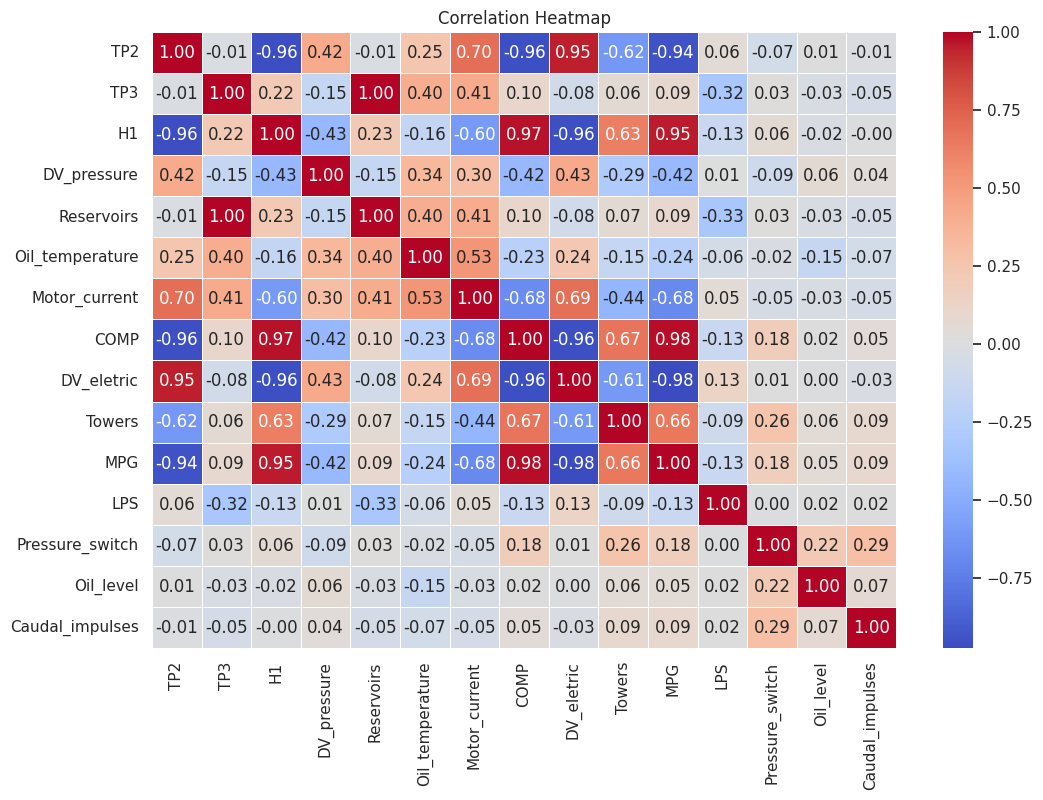

In [71]:
# Feature Selection using Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix
correlation_matrix = new_df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [61]:
# Get correlations with 'Motor_current' (target variable)
correlations_with_target = correlation_matrix['Motor_current'].sort_values(ascending=False)

# Print correlations with 'Motor_current'
print("Correlations with Motor_current:")
print(correlations_with_target)

Correlations with Motor_current:
Motor_current      1.000000
TP2                0.697480
DV_eletric         0.689828
Oil_temperature    0.528739
TP3                0.413756
Reservoirs         0.412691
DV_pressure        0.302160
LPS                0.053664
Oil_level         -0.032793
Pressure_switch   -0.047003
Caudal_impulses   -0.051145
Towers            -0.439421
H1                -0.600178
COMP              -0.681326
MPG               -0.683543
Name: Motor_current, dtype: float64


Here are the attributes that seem to have a relatively strong correlation with 'Motor_current' (either positive or negative):

- 'TP2'
- 'DV_eletric'
- 'Oil_temperature'
- 'TP3'
- 'Reservoirs'
- 'DV_pressure'
- 'Towers'
- 'H1'
- 'COMP'
- 'MPG'

In [82]:
# Selected features
predictors = ['TP2', 'DV_eletric', 'Oil_temperature', 'TP3', 'Reservoirs', 'DV_pressure', 'Towers', 'H1', 'COMP', 'MPG']

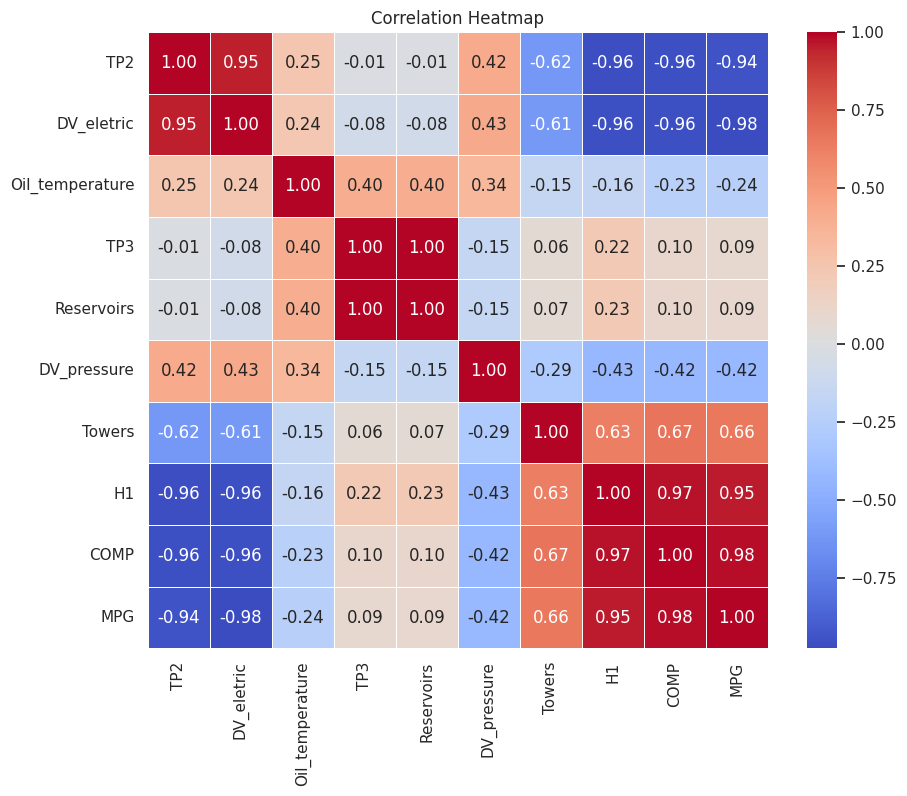

In [83]:
# Checking mutual correlation of the selected fratures
correlation_matrix = new_df[predictors].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Highly Correlated features:**\


In [84]:
# Removing highly correlated features for prediction
highly_corr = ['Reservoirs','H1', 'COMP','DV_eletric']
filtered_predictors = [col for col in predictors if col not in highly_corr]
print(filtered_predictors)

['TP2', 'Oil_temperature', 'TP3', 'DV_pressure', 'Towers', 'MPG']


**Train-test split based on months**\
- 6 months for training set
- one month for validation set
- one month for test set

In [85]:
# Data Preparation
X = df[filtered_predictors]
y = df['Motor_current']

In [87]:
# Define the date ranges for train, validation, and test splits
train_start_date = '2020-01-01'
validation_start_date = '2020-07-01'
test_start_date = '2020-08-01'

# Split the data based on dates
train_data = df[df['timestamp'] < validation_start_date]
valid_data = df[(df['timestamp'] >= validation_start_date) & (df['timestamp'] < test_start_date)]
test_data = df[df['timestamp'] >= test_start_date]

# Split the features and target variable
X_train = train_data[filtered_predictors]
y_train = train_data['Motor_current']

X_val = valid_data[filtered_predictors]
y_val = valid_data['Motor_current']

X_test = test_data[filtered_predictors]
y_test = test_data['Motor_current']

# Verify the shapes of the splits
print(f'Train Data Shape: {X_train.shape}, y_train Shape: {y_train.shape}')
print(f'Validation Data Shape: {X_val.shape}, y_valid Shape: {y_val.shape}')
print(f'Test Data Shape: {X_test.shape}, y_test Shape: {y_test.shape}')


Train Data Shape: (1073346, 6), y_train Shape: (1073346,)
Validation Data Shape: (222638, 6), y_valid Shape: (222638,)
Test Data Shape: (220964, 6), y_test Shape: (220964,)


**Scaling / Normalization**

In [88]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data (X_train)
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Scaling of y remaining**

### **Model Building and Evaluation**

In [89]:
# Importing Required Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Basic model training on train set, prediction and evaluation on test set**

**Linear Regression**

In [95]:
def model_fit_pred(model_reg,X_train,y_train,X_val,y_val,X_test,y_test):

    # fit model to the training data
    model = model_reg
    model.fit(X_train, y_train)

    # Prediction on train set
    y_train_pred =model.predict(X_train)
    # Prediction on validation set
    y_val_pred =model.predict(X_val)
    # Prediction on test set
    y_test_pred =model.predict(X_test)

    return y_train_pred, y_val_pred, y_test_pred

In [96]:
def evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred):
  # Calculate performance metrics for train set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate performance metrics for validation set
    validation_mse = mean_squared_error(y_val, y_val_pred)
    validation_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    validation_mae = mean_absolute_error(y_val, y_val_pred)
    validation_r2 = r2_score(y_val, y_val_pred)

    # Calculate performance metrics for test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)


    # Print the performance metrics
    print("Train Set Metrics:")
    print(f"RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2-Score: {train_r2:.4f}")

    print("\nValidation Set Metrics:")
    print(f"RMSE: {validation_rmse:.4f}, MAE: {validation_mae:.4f}, R2-Score: {validation_r2:.4f}")

    print("\nTest Set Metrics:")
    print(f"RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2-Score: {test_r2:.4f}")

    return train_rmse, train_mae, train_r2, validation_rmse, validation_mae, validation_r2, test_rmse, test_mae, test_r2

In [101]:
#Predictions
y_train_pred, y_val_pred, y_test_pred = model_fit_pred(LinearRegression(),X_train,y_train,X_val,y_val,X_test,y_test)

# Model Performance
train_rmse, train_mae, train_r2, validation_rmse, validation_mae, validation_r2, test_rmse, test_mae, test_r2 = evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred)

Train Set Metrics:
RMSE: 1.1711, MAE: 0.9455, R2-Score: 0.7455

Validation Set Metrics:
RMSE: 1.2756, MAE: 1.0599, R2-Score: 0.6795

Test Set Metrics:
RMSE: 1.1984, MAE: 1.0156, R2-Score: 0.7128


### **Polynomial Regression**

In [106]:
def poly_reg(X_train,y_train,X_val,y_val,X_test,y_test,degree):
     # Create PolynomialFeatures
    poly_features = PolynomialFeatures(degree=degree)

    # Transform the input features
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)
    X_test_poly = poly_features.transform(X_test)

    return X_train_poly, X_val_poly, X_test_poly

In [108]:
# #fitting polynomial features
# X_train_poly, X_val_poly, X_test_poly = poly_reg(X_train,y_train,X_val,y_val,X_test,y_test,degree=2)

# #Predictions
# y_train_pred, y_val_pred, y_test_pred = model_fit_pred(LinearRegression(),X_train_poly, X_val_poly, X_test_poly,y_train,y_val,y_test)

# # Model Performance
# train_rmse, train_mae, train_r2, validation_rmse, validation_mae, validation_r2, test_rmse, test_mae, test_r2 = evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred)

In [ ]:
def poly_reg(X_train,y_train,X_val,y_val,X_test,y_test,degree):
     # Create PolynomialFeatures
    poly_features = PolynomialFeatures(degree=degree)

    # Transform the input features
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)
    X_test_poly = poly_features.transform(X_test)

    # # Train the Polynomial Regression Model
    # model = LinearRegression()
    # model.fit(X_train_poly, y_train)

    # # Make Predictions on Training, Validation, and Test Data
    # y_train_pred = model.predict(X_train_poly)
    # y_val_pred = model.predict(X_val_poly)
    # y_test_pred = model.predict(X_test_poly)

    # # Evaluate the Model
    # mse_train = mean_squared_error(y_train, y_train_pred)
    # r2_train = r2_score(y_train, y_train_pred)

    # mse_val = mean_squared_error(y_val, y_val_pred)
    # r2_val = r2_score(y_val, y_val_pred)

    # mse_test = mean_squared_error(y_test, y_test_pred)
    # r2_test = r2_score(y_test, y_test_pred)

    # print(f'Training MSE: {mse_val}, R-squared: {r2_val}')
    # print(f'Validation MSE: {mse_val}, R-squared: {r2_val}')
    # print(f'Test MSE: {mse_test}, R-squared: {r2_test}')

In [ ]:
poly_reg(X_train, y_train, X_val, y_val, X_test, y_test,degree=2)

Training MSE: 0.8703157058334919, R-squared: 0.8357129155128235
Validation MSE: 0.8703157058334919, R-squared: 0.8357129155128235
Test MSE: 0.8817620223738982, R-squared: 0.8334492774732214


In [ ]:
poly_reg(X_train_scaled,y_train,X_val_scaled,y_val,X_test_scaled,y_test,degree=2)

Training MSE: 0.8703205870375225, R-squared: 0.8357119941014626
Validation MSE: 0.8703205870375225, R-squared: 0.8357119941014626
Test MSE: 0.8817734407722531, R-squared: 0.8334471207206647


In [ ]:
poly_reg(X_train, y_train, X_val, y_val, X_test, y_test,degree=3)

Training MSE: 1.0179986891328772, R-squared: 0.807835207926944
Validation MSE: 1.0179986891328772, R-squared: 0.807835207926944
Test MSE: 14.527408075864386, R-squared: -1.7439946948073457


In [ ]:
poly_reg(X_train_scaled,y_train,X_val_scaled,y_val,X_test_scaled,y_test,degree=3)

Training MSE: 0.7084182230277352, R-squared: 0.8663493258630844
Validation MSE: 7926775501676874.0, R-squared: -1496315449469801.5
Test MSE: 341964489554182.2, R-squared: -64591614708484.83


**Ridge Regression**

In [ ]:
# Create a Ridge Regression model
ridge = Ridge()

# Range of alpha values to search
alphas = [0.01, 0.1, 1, 10, 100]

# Define the hyperparameter grid
param_grid = {'alpha': alphas}

# Create a grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your training data
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']

# Create a Ridge model with the best alpha value
best_ridge = Ridge(alpha=best_alpha)

# Train the model on the entire training dataset
best_ridge.fit(X_train_scaled, y_train)

# Make Predictions on Training, Validation, and Test Data
y_train_pred = best_ridge.predict(X_train_scaled)
y_val_pred = best_ridge.predict(X_val_scaled)
y_test_pred = best_ridge.predict(X_test_scaled)

# Evaluate the model on training, validation, and test data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the best alpha value and evaluation metrics
print(f'Best Alpha: {best_alpha}')
print(f'Training MSE: {mse_train}, R-squared: {r2_train}')
print(f'Validation MSE: {mse_val}, R-squared: {r2_val}')
print(f'Test MSE: {mse_test}, R-squared: {r2_test}')


Best Alpha: 0.01
Training MSE: 1.3087459106790436, R-squared: 0.7530910872272443
Validation MSE: 1.3113328634288333, R-squared: 0.7524633285588889
Test MSE: 1.2979809574350685, R-squared: 0.7548321873686428


**Lasso Regression with Hyperparameter tuning**

In [ ]:
# Create a LassoCV model instance
lasso_regressor = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5)

# Train the model on the scaled training data
lasso_regressor.fit(X_train_scaled, y_train)

# Make predictions on the validation and test data
y_train_pred = best_ridge.predict(X_train_scaled)
y_val_pred = lasso_regressor.predict(X_val_scaled)
y_test_pred = lasso_regressor.predict(X_test_scaled)

# Evaluate the model on training, validation, and test data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the best alpha value and evaluation metrics
print(f'Best Alpha: {best_alpha}')
print(f'Training MSE: {mse_train}, R-squared: {r2_train}')
print(f'Validation MSE: {mse_val}, R-squared: {r2_val}')
print(f'Test MSE: {mse_test}, R-squared: {r2_test}')


Best Alpha: 0.01
Training MSE: 1.3087459106790436, R-squared: 0.7530910872272443
Validation MSE: 1.3335668984874072, R-squared: 0.7482662713626607
Test MSE: 1.316492006220939, R-squared: 0.7513357467511221


### **Random Forest Regression**

In [ ]:
rf = RandomForestRegressor(random_state = 42)

# Number of trees in random forest
n_estimators = [50,100,150,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3,6,9]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Train the model on training data
rf.fit(X_train,y_train)


# Make predictions on the validation and test data
y_train_pred = rf.predict(X_train_scaled)
y_val_pred = rf.predict(X_val_scaled)
y_test_pred = rf.predict(X_test_scaled)

# Evaluate the model on training, validation, and test data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f'Training MSE: {mse_train}, R-squared: {r2_train}')
print(f'Validation MSE: {mse_val}, R-squared: {r2_val}')
print(f'Test MSE: {mse_test}, R-squared: {r2_test}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Training MSE: 10.336154948039356, R-squared: -0.9500261736420508
Validation MSE: 10.336960728397422, R-squared: -0.9512794370411568
Test MSE: 10.322186041916652, R-squared: -0.9496956091493587
